In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from collections import defaultdict
import time

In [8]:
data_path = "vocdata/"
s1 = pd.read_excel(data_path + "BP-1908.xls")
s1.head()

,Data Acquisition Time,Time,Component,Height,Area,Conc.,Conc,Unnamed: 7
0,2019-08-01 01:19:41,11.88,n-Hexane,1546.18,9666.96,1.99,1.17,NaN
1,2019-08-01 01:19:41,14.03,Methylcyclopentane,231.39,2356.65,0.52,0.3,NaN
2,2019-08-01 01:19:41,14.40,"2,4-dimethylpentane",0.00,0.00,0.00,--------,NaN
3,2019-08-01 01:19:41,16.25,Benzene,1605.56,13225.75,2.89,1.54,NaN
4,2019-08-01 01:19:41,17.17,Cyclohexane,185.69,1579.35,0.33,0.19,NaN


In [9]:
s1_list = s1.values.tolist()
print(s1_list[0])
components = []
data_times = []
for i in range(len(s1_list)):
    components.append(s1_list[i][2])
    data_times.append(str(s1_list[i][0])[9:-3])
    # data_times.append(time.strftime(str(s1_list[i][0]), '%Y-%m-%d %H:%M:%S'))
components  = set(components)
data_times = list(set(data_times))
data_times = sorted(data_times)
print(data_times)
print("components共有" + str(len(components))+ "种\n为" + str(components))


[Timestamp('2019-08-01 01:19:41'), 11.88, 'n-Hexane', 1546.18, 9666.96, 1.99, 1.17, nan]
['1 01:19', '1 02:19', '1 03:19', '1 04:19', '1 05:19', '1 06:19', '1 07:19', '1 08:19', '1 09:19', '1 10:19', '1 11:19', '1 12:19', '1 13:19', '1 14:19', '1 15:21', '1 16:21', '1 17:21', '1 18:21', '1 19:21', '1 20:21', '1 21:21', '1 22:21', '1 23:21', '2 01:21', '2 02:21', '2 03:21', '2 04:21', '2 05:21', '2 06:21', '2 07:21', '2 08:21', '2 09:21', '2 10:21', '2 11:21', '2 12:21', '2 13:21', '2 14:21', '2 15:21', '2 16:21', '2 17:21', '2 18:21', '2 19:21', '2 20:21', '2 21:21', '2 22:21', '2 23:21', '3 01:21', '3 02:21', '3 03:21', '3 04:21', '3 05:21', '3 06:21', '3 07:21', '3 08:21', '3 09:21', '3 10:21', '3 11:21', '3 12:21', '3 13:21', '3 14:21', '3 15:21', '3 16:21', '3 17:21', '3 18:21', '3 19:21', '3 20:21', '3 21:21', '3 22:21', '3 23:21', '4 01:22', '4 02:22', '4 03:22', '4 04:21', '4 05:21', '4 06:21', '4 07:21', '4 08:21', '4 09:21', '4 10:21', '4 11:21', '4 12:21', '4 13:21', '4 14:21

[1.99, 4.59, 4.49, 4.41, 4.25, 4.0, 3.93, 3.84, 3.91, 3.84, 3.8, 3.69, 3.75, 3.41, 3.49, 3.61, 3.55, 3.47, 3.33, 3.4, 3.48, 3.15, 2.98, 3.22, 3.11, 3.16, 3.11, 3.01, 2.97, 3.09, 2.94, 2.49, 2.81, 2.94, 2.76, 2.86, 3.06, 2.85, 2.74, 2.88, 2.69, 3.43, 4.9, 6.44, 8.31, 9.63, 10.22, 10.27, 9.82, 9.27, 8.96, 8.35, 7.71, 7.01, 6.52, 5.95, 5.63, 5.24, 4.9, 4.58, 4.37, 4.15, 4.02, 4.33, 3.87, 3.69, 3.46, 3.64, 3.6, 3.27, 4.21, 4.36, 4.16, 4.14, 4.25, 4.26, 4.01, 3.83, 3.71, 3.62, 3.56, 3.28, 3.28, 3.23, 3.18, 3.2, 3.11, 3.01, 2.79, 3.34, 3.04, 3.03, 2.99, 2.69, 2.82, 2.84, 2.59, 2.67, 2.76, 2.74, 2.58, 2.78, 2.87, 2.49, 2.4, 2.46, 3.08, 3.51, 4.17, 4.56, 4.9, 5.41, 5.58, 5.82, 5.83, 5.93, 5.8, 5.64, 5.38, 5.18, 4.9, 4.72, 4.43, 4.44, 4.17, 3.89, 3.57, 3.66, 3.55, 3.09, 3.34, 3.15, 3.06, 3.05, 2.76, 3.06, 2.97, 2.58, 3.02, 3.0, 3.2, 3.36, 3.23, 3.22, 3.23, 3.18, 3.2, 3.32, 3.3, 3.04, 3.21, 3.01, 2.91, 2.91, 3.06, 2.86, 2.87, 2.79, 2.93, 0.95, 2.7, 2.68, 2.52, 2.73, 2.66, 2.65, 2.62, 2.6, 2.66, 

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


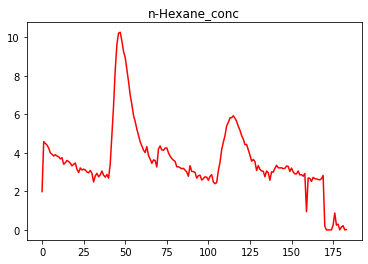

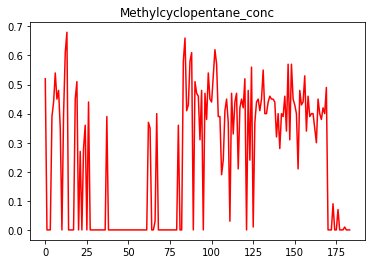

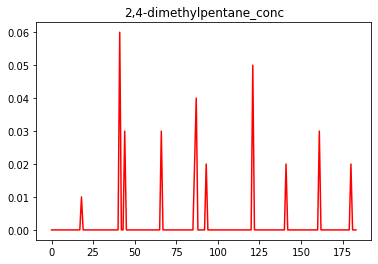

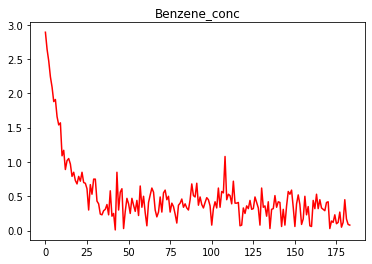

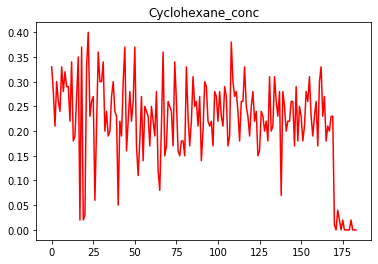

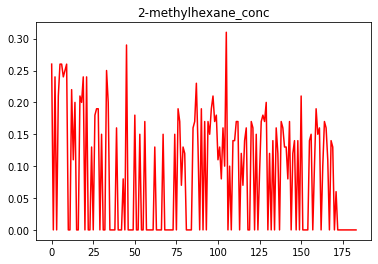

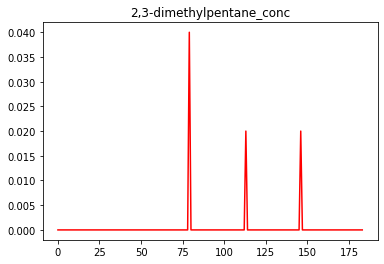

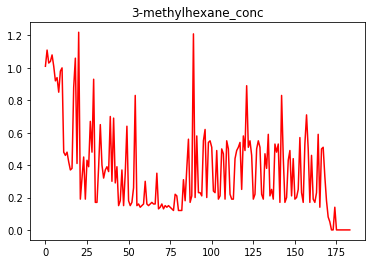

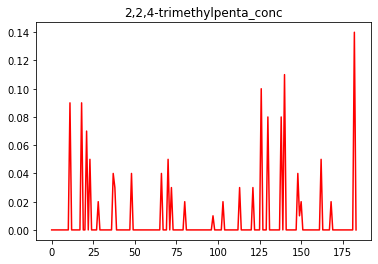

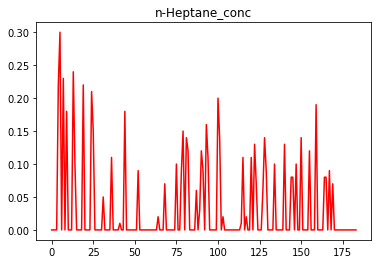

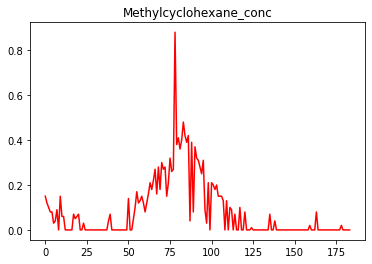

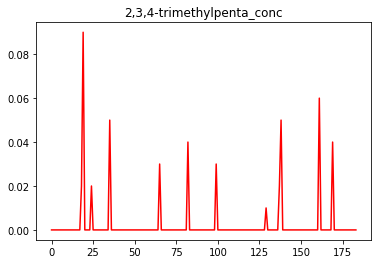

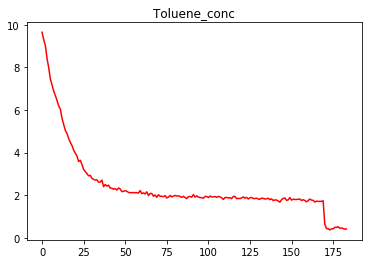

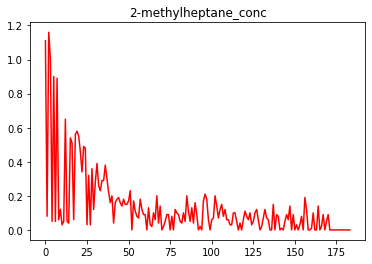

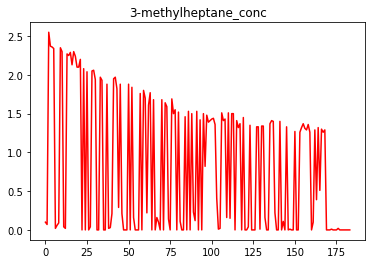

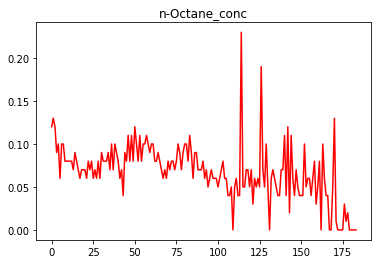

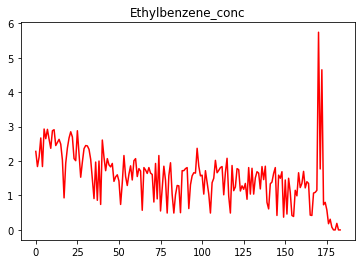

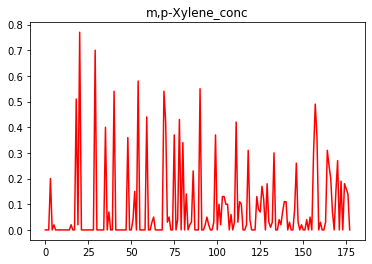

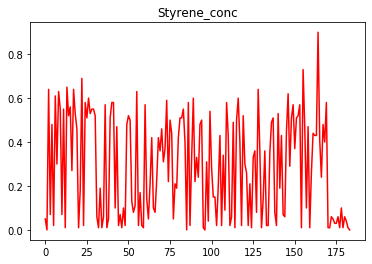

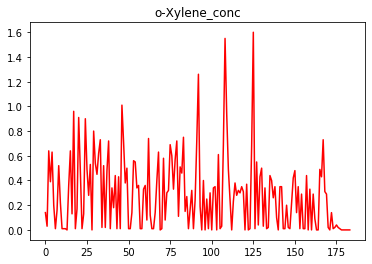

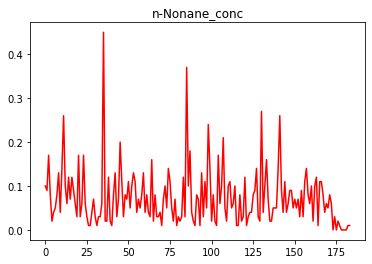

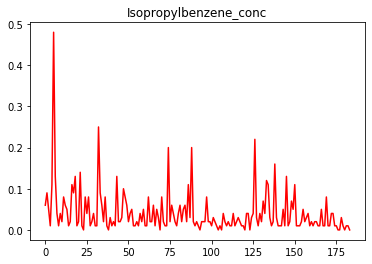

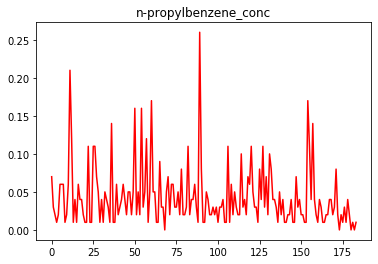

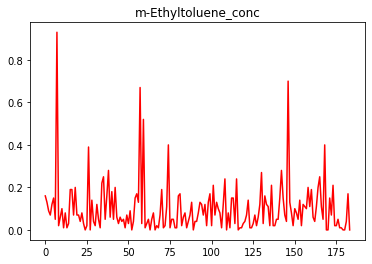

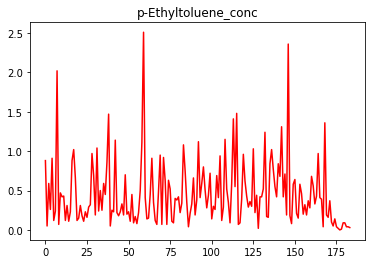

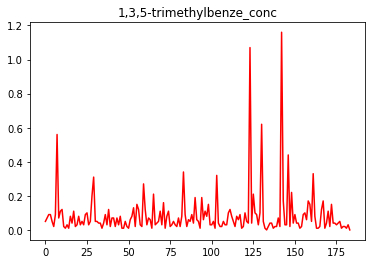

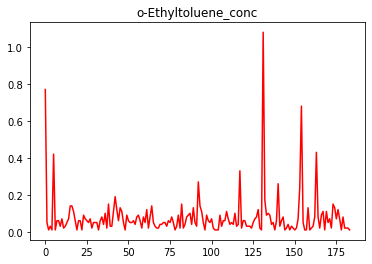

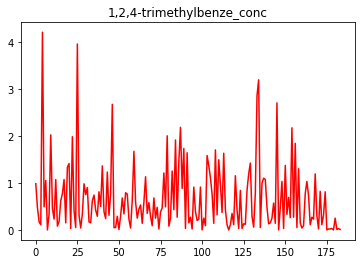

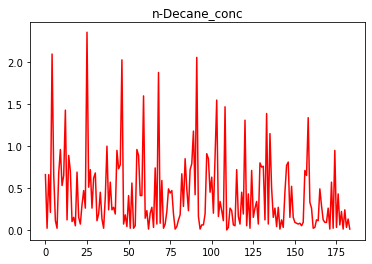

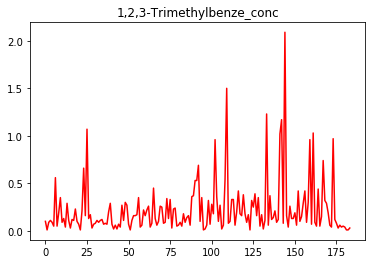

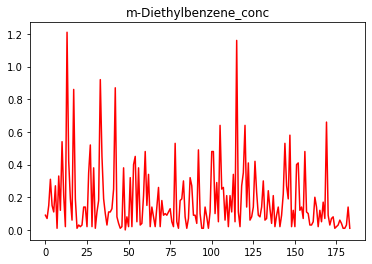

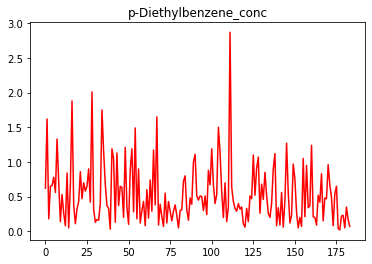

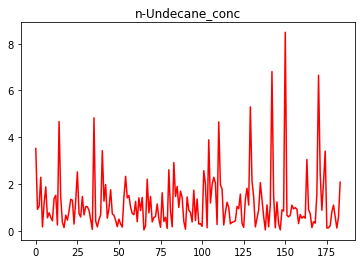

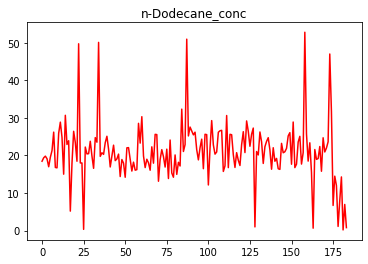

In [15]:
conc_dict = defaultdict(list)
for i in range(len(s1_list)):
    conc_dict[s1_list[i][2]].append(s1_list[i][5])
print(conc_dict["n-Hexane"])

save_path = "pic_1908_conc/"
print(data_times)
for k, v in conc_dict.items():
    fig = plt.figure()
    ax = fig.subplots(1, 1)
    # ax.set_xticks(np.arange(0, len(data_times)))
    # ax.set_xticklabels(data_times, rotation=45)
    ax.plot(v, "r")
    ax.set_title(k+"_conc")
    fig.savefig(save_path+"{}_conc.jpg".format(k), dpi=200)
    # fig.show()